# TIC norm with imputation

In [17]:
library(glue)

In [18]:
exp_label = "TICnorm_wtImp"

In [19]:
input_matrix_name = "../../output/preprocessing_97/FC_log2_hMinImp_TICnorm_groupFil0.3_HILICpos_featab.csv"
meta_data_name = "../../input/sequence_file/clean_meta_df_wt1_HILICpos.csv"

In [20]:
rn = sample(1:100, 1)
output_dir <- glue("../../output/PCA/TICnorm_wtImp_{rn}")
dir.create(output_dir)

In [21]:
df = read.table(input_matrix_name, header = TRUE,sep = ',',row.name = 1)
meta_df = read.table(meta_data_name, header = TRUE, sep = ',')

In [22]:
# since the meta_df originally have techincal replicates, which is not unique after technical replicate summaries
# Thus processing metadata a little bit to retain only relevant rows
sub_meta_df <- meta_df[c('tID_dedup','class','biological_samples','cell_number')]
sub_meta_df <- unique(sub_meta_df)

rownames(sub_meta_df) = sub_meta_df$tID_dedup

In [23]:
data.df = df[,grep('R5pos\\_[0-9]+|R5neg\\_[0-9]+|Naive\\_[0-9]+',colnames(df))]

In [24]:
head(data.df)

,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F6,17.32893,17.49848,17.95874,18.26230,18.00141,18.76979,16.50376,16.40300,16.52377
F7,17.04856,15.43534,16.33662,18.23841,16.74748,17.72045,15.76916,16.82645,16.10865
F13,19.87360,20.56377,20.84342,20.89855,20.89947,21.25453,19.51054,20.07431,20.83670
F18,20.57685,20.56563,20.21117,20.96700,21.07304,21.79830,21.26521,20.50973,20.01551
F31,17.78949,18.78949,17.78949,19.75690,19.61354,19.86308,17.78949,17.78949,17.78949
F32,15.51607,16.51607,15.51607,19.27638,18.69453,19.51959,15.51607,15.51607,15.51607


In [25]:
if(any(data.df > 10000)) {
    data.df[data.df == 0] = NA
    data.df.log2 = log2(data.df)
} else {
    data.df.log2 = data.df
}

In [26]:
head(data.df.log2)

,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F6,17.32893,17.49848,17.95874,18.26230,18.00141,18.76979,16.50376,16.40300,16.52377
F7,17.04856,15.43534,16.33662,18.23841,16.74748,17.72045,15.76916,16.82645,16.10865
F13,19.87360,20.56377,20.84342,20.89855,20.89947,21.25453,19.51054,20.07431,20.83670
F18,20.57685,20.56563,20.21117,20.96700,21.07304,21.79830,21.26521,20.50973,20.01551
F31,17.78949,18.78949,17.78949,19.75690,19.61354,19.86308,17.78949,17.78949,17.78949
F32,15.51607,16.51607,15.51607,19.27638,18.69453,19.51959,15.51607,15.51607,15.51607


In [27]:
sub_meta_df = sub_meta_df[colnames(data.df.log2),]

In [28]:
sub_meta_df

,tID_dedup,class,biological_samples,cell_number
,<chr>,<chr>,<chr>,<int>
Naive_1,Naive_1,Naive,Yes,300
Naive_2,Naive_2,Naive,Yes,300
Naive_3,Naive_3,Naive,Yes,300
R5neg_1,R5neg_1,R5neg,Yes,655
R5neg_2,R5neg_2,R5neg,Yes,687
R5neg_3,R5neg_3,R5neg,Yes,865
R5pos_1,R5pos_1,R5pos,Yes,142
R5pos_2,R5pos_2,R5pos,Yes,200
R5pos_3,R5pos_3,R5pos,Yes,150


In [29]:
library(stringr)
ordered_group_v = str_extract(colnames(data.df.log2),'Naive|R5neg|R5pos')

In [30]:
color_v = c('Naive' = "#888888", 'R5neg' = "#ff0000",'R5pos' = '#0000ff')[ordered_group_v]

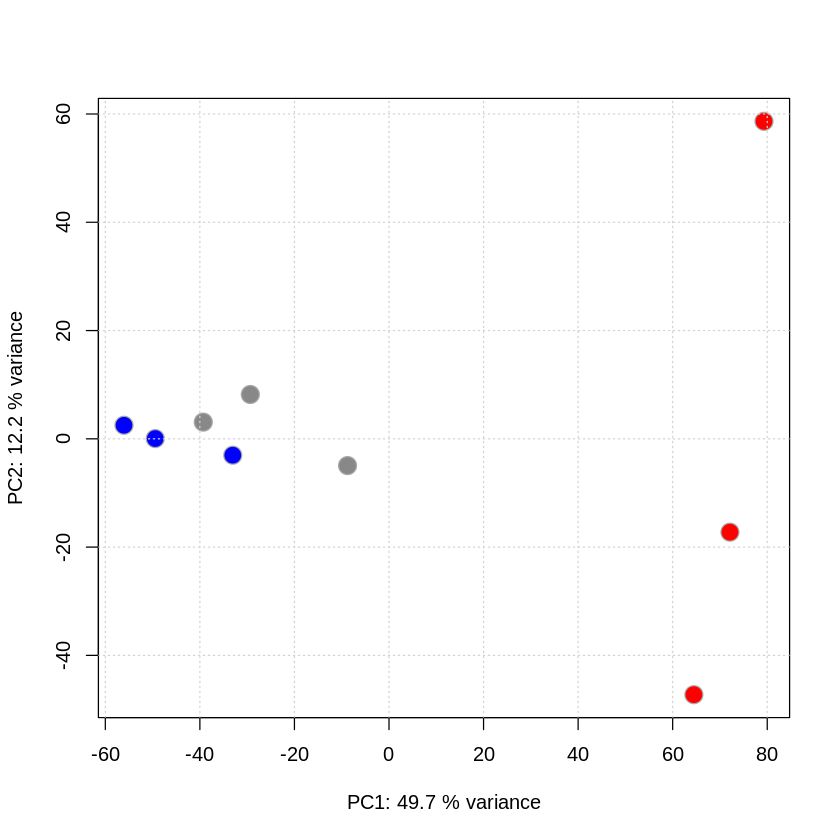

In [31]:
#' Perform the PCA omitting all features with an NA in any of the
pc <- prcomp(t(na.omit(data.df.log2)), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
    # text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2)
    # pos = 3, cex = 2)

In [32]:
# print the pdf
pdf(file.path(output_dir,glue("{exp_label}_PCA_no_labels.pdf")))
#' Perform the PCA omitting all features with an NA in any of the
pc <- prcomp(t(na.omit(data.df.log2)), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
    # text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2)

dev.off()

png 
  2

-----